# Diabetes Database EDA

The purpose of this notebook is to bring out insights and findings from the dataset. 

**Contents:**

1. Import necessary libraries and load the dataset
2. Descriptive Statistics of Dataset
3. Checking missing values
4. Handling columns with "0" values
   * Handle: Glucose, BloodPressure, BMI
       * Finding outliers: Glucose, BloodPressure, BMI
       * Replace Values: Glucose, BloodPressure, BMI
   * Handle: Insulin in respect to Glucose
   * Handle: Skinthickness in respect to BMI
5. Visualization
6. Courtesy

# 1. Import necessary libraries and load the dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.simplefilter("ignore")

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
display(df.head())
display(df.tail())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In the "Insulin" column there are "0" values which is not possible.

# 2. Descriptive Statistics of Dataset

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.describe().columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.shape

(768, 9)

# 3. Checking missing values

In [8]:
df.isnull().values.any()


False

In [9]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here, we can see that there are no null values in the dataset. However, earlier we found that in the column there are "0" values. This might be the case for other columns as well. We have to take care of the "0" values. 

# 4. Handling columns with "0" values

In [10]:
print((df[df.columns] == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


We can not drop the "0" values because the dataset is small and has only 768 columns or cases.

"0" Pregnancies are a real possibility so I'll work with all the other columns consisting of "0" values except the Pregnancies column. 

Now I'll replace all the "0" values with NaN/ Null values. 

In [11]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [13]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# 4.1 Handle: Glucose, BloodPressure, BMI

Null values can be replaced by Mean/Median/Mode values. How to decide which value to replace Null values with?

The mean of the numerical column data is used to replace null values when the data is normally distributed. Median is used if the data comprised of outliers. Mode is used when the data having more occurences of a particular value or more frequent value. [[ref](https://medium.com/bycodegarage/a-comprehensive-guide-on-handling-missing-values-b1257a4866d1#:~:text=The%20mean%20of%20the%20numerical%20column%20data%20is%20used%20to%20replace%20null%20values%20when%20the%20data%20is%20normally%20distributed.%20Median%20is%20used%20if%20the%20data%20comprised%20of%20outliers.%20Mode%20is%20used%20when%20the%20data%20having%20more%20occurences%20of%20a%20particular%20value%20or%20more%20frequent%20value.)]

# 4.1.1 Finding outliers: Glucose, BloodPressure, BMI

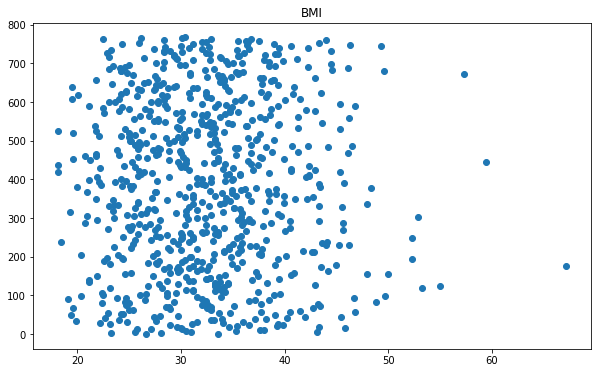

In [14]:
fig = plt.figure(figsize=(10,6))
y = range(768)
plt.scatter(df["BMI"],y)
plt.title("BMI")
plt.show()

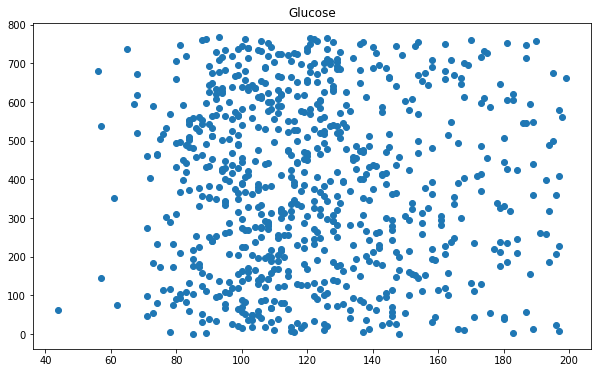

In [15]:
fig = plt.figure(figsize=(10,6))
y = range(768)
plt.scatter(df["Glucose"],y)
plt.title("Glucose")
plt.show()

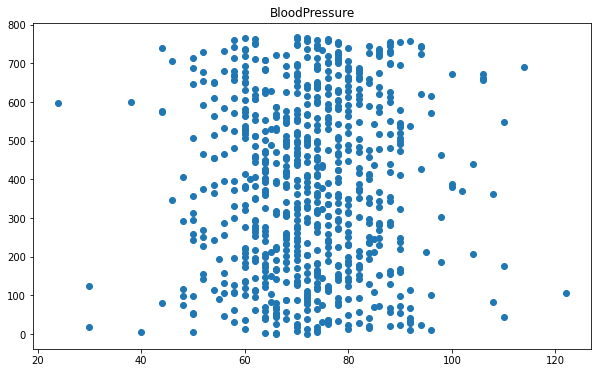

In [16]:
fig = plt.figure(figsize=(10,6))
y = range(768)
plt.scatter(df["BloodPressure"],y)
plt.title("BloodPressure")
plt.show()

We can see that there are outliers present in BMI,BloodPressure & Glucose columns. So, we'll replace the Null values with Median in all 3 columns. 

# 4.1.2 Replace Values: Glucose, BloodPressure, BMI

In [17]:
df['Glucose'].fillna(df['Glucose'].median(), inplace =True)

df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace =True)

df['BMI'].fillna(df['BMI'].median(), inplace =True)

# 4.2 Handle: Insulin in respect to Glucose

Insulin has an effect on a number of cells, including muscle, red blood cells, and fat cells. In response to insulin, these cells absorb glucose out of the blood, having the net effect of lowering the high blood glucose levels into the normal range. [[ref](https://www.google.com/search?q=insuling+and+glucose+corelation&oq=insuling+and+glucose+corelation&aqs=edge..69i57j0i8i13i30j0i390l4.11998j0j1&sourceid=chrome&ie=UTF-8#:~:text=insulin%20has%20an%20effect%20on%20a%20number%20of%20cells%2C%20including%20muscle%2C%20red%20blood%20cells%2C%20and%20fat%20cells.%20In%20response%20to%20insulin%2C%20these%20cells%20absorb%20glucose%20out%20of%20the%20blood%2C%20having%20the%20net%20effect%20of%20lowering%20the%20high%20blood%20glucose%20levels%20into%20the%20normal%20range.)]

Since Insulin and Glucose are correlated, we'll handle Null values in Insulin column in respect to Glucose.

In [18]:
by_Glucose_Age_Insulin_Grp = df.groupby(['Glucose'])

def fill_Insulin(series):
    return series.fillna(series.median())
df['Insulin'] = by_Glucose_Age_Insulin_Grp['Insulin'].transform(fill_Insulin)

In [19]:
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

# 4.3 Handle: Skinthickness in respect to BMI

Skinfold thicknesses are more strongly associated with body fatness, as estimated by various reference methods, than is BMI (8–12). Because of these stronger associations with body fatness, it is frequently assumed that skinfold thicknesses would be better predictors of adverse health outcomes than BMI. [[ref](https://www.google.com/search?q=skin+thickeness+and+bmi+corelation&oq=skin+thickeness+and+bmi+corelation&aqs=edge..69i57.22834j0j9&sourceid=chrome&ie=UTF-8#:~:text=Skinfold%20thicknesses%20are,outcomes%20than%20BMI.)]

Since Skinthickness and BMI are correlated, we'll handle Null values in Skinthickness column in respect to BMI.

In [20]:
by_BMI_Insulin = df.groupby(['BMI'])

def fill_Skinthickness(series):
    return series.fillna(series.mean())
df['SkinThickness'] = by_BMI_Insulin['SkinThickness'].transform(fill_Skinthickness)

In [21]:
df['SkinThickness'].fillna(df['SkinThickness'].mean(),inplace= True)

In [22]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**All the missing values have been replaced, there are no remaining missing values.**

# 5. Visualization

In [23]:
df["Glucose"].value_counts()

99.0     17
100.0    17
117.0    16
129.0    14
125.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: Glucose, Length: 135, dtype: int64

In [24]:
df["Age"].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

array([<AxesSubplot:ylabel='Outcome'>], dtype=object)

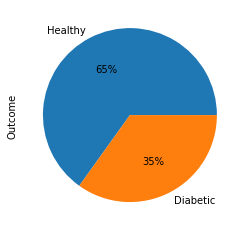

In [25]:
labels = ["Healthy", "Diabetic"]

df["Outcome"].value_counts().plot(kind="pie",labels=labels,subplots=True,autopct='%1.0f%%')

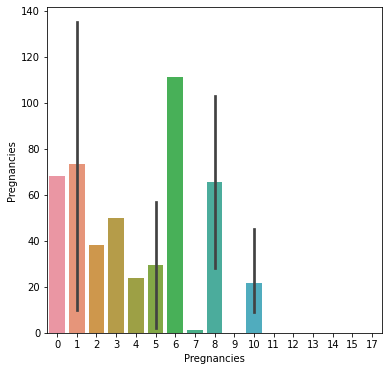

In [26]:
y = df["Pregnancies"].value_counts()
plt.figure(figsize = (6,6))
sns.barplot(x='Pregnancies', y= y, data=df)
plt.show()

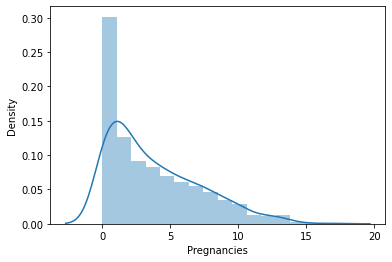

In [27]:
Pregnancies1=df['Pregnancies'].dropna()
sns.distplot(Pregnancies1)         
plt.show()

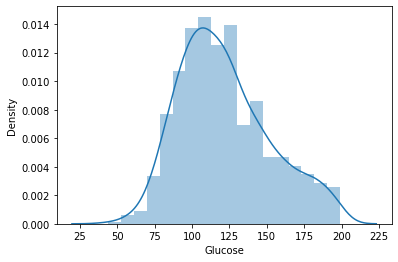

In [28]:
Glucose1=df['Glucose'].dropna()
sns.distplot(Glucose1)         
plt.show()

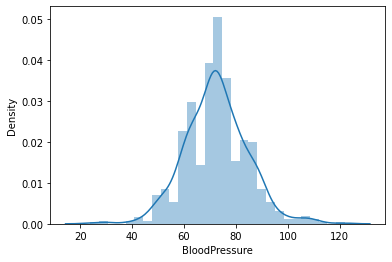

In [29]:
BloodPressure1 =df['BloodPressure'].dropna()
sns.distplot(BloodPressure1)         
plt.show()

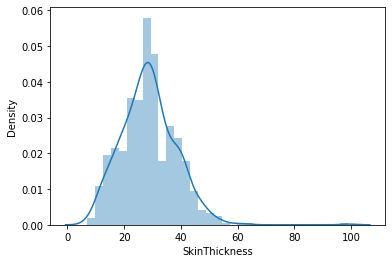

In [30]:
SkinThickness1 =df['SkinThickness'].dropna()
sns.distplot(SkinThickness1)         
plt.show()

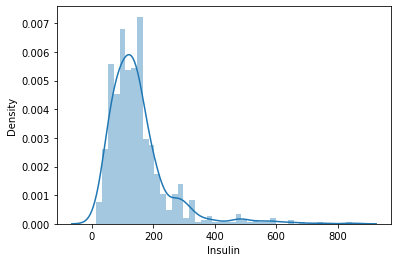

In [31]:
Insulin1 =df['Insulin'].dropna()
sns.distplot(Insulin1)         
plt.show()

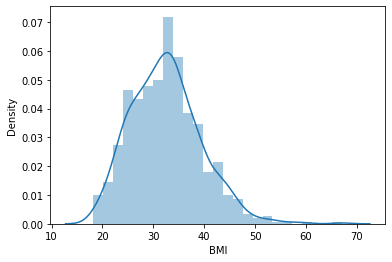

In [32]:
BMI1 =df['BMI'].dropna()
sns.distplot(BMI1)         
plt.show()

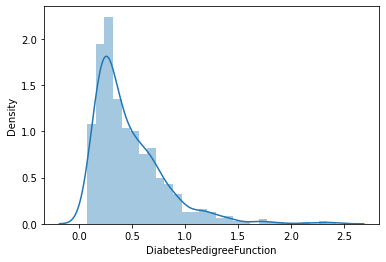

In [33]:
DiabetesPedigreeFunction1 =df['DiabetesPedigreeFunction'].dropna()
sns.distplot(DiabetesPedigreeFunction1)         
plt.show()

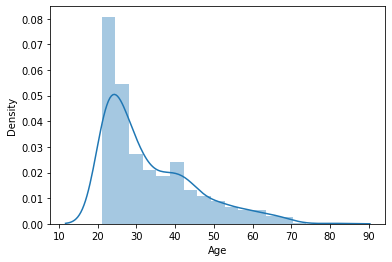

In [34]:
Age1 =df['Age'].dropna()
sns.distplot(Age1)         
plt.show()

# 6. Courtesy

Courtesy to HARSH JAIN's notebook: https://www.kaggle.com/harshjain123/diabetes-eda-model